In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict the amount of purchase

# Load the data

In [2]:
#input
df_original = pd.read_csv('black_friday_processed.csv')
df = df_original.copy()
print(df.columns)
df.head()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [3]:
print(df.shape)
print(df.dtypes)

(537577, 12)
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object


# Feature Engineering 

In [4]:
# TODO: create a loop to transform the categorical columns to numerical
for col in ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    df_dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, df_dummies], axis=1)
    # Remove the original columns
    del df[col]
df.head()

,User_ID,Product_ID,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,...,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18
0,1000001,P00069042,8370,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,15200,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1000001,P00087842,1422,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,1057,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,7969,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.dtypes

User_ID                   int64
Product_ID               object
Purchase                  int64
Gender_F                  uint8
Gender_M                  uint8
Age_0-17                  uint8
Age_18-25                 uint8
Age_26-35                 uint8
Age_36-45                 uint8
Age_46-50                 uint8
Age_51-55                 uint8
Age_55+                   uint8
Occupation_0              uint8
Occupation_1              uint8
Occupation_2              uint8
Occupation_3              uint8
Occupation_4              uint8
Occupation_5              uint8
Occupation_6              uint8
Occupation_7              uint8
Occupation_8              uint8
Occupation_9              uint8
Occupation_10             uint8
Occupation_11             uint8
Occupation_12             uint8
Occupation_13             uint8
Occupation_14             uint8
Occupation_15             uint8
Occupation_16             uint8
Occupation_17             uint8
                          ...  
Product_

In [6]:
# select the columns
X_columns = [x for x in df.columns if x != 'Purchase' and df.loc[:,x].dtype != object]
y_column = ['Purchase']
list(X_columns)

['User_ID',
 'Gender_F',
 'Gender_M',
 'Age_0-17',
 'Age_18-25',
 'Age_26-35',
 'Age_36-45',
 'Age_46-50',
 'Age_51-55',
 'Age_55+',
 'Occupation_0',
 'Occupation_1',
 'Occupation_2',
 'Occupation_3',
 'Occupation_4',
 'Occupation_5',
 'Occupation_6',
 'Occupation_7',
 'Occupation_8',
 'Occupation_9',
 'Occupation_10',
 'Occupation_11',
 'Occupation_12',
 'Occupation_13',
 'Occupation_14',
 'Occupation_15',
 'Occupation_16',
 'Occupation_17',
 'Occupation_18',
 'Occupation_19',
 'Occupation_20',
 'City_Category_A',
 'City_Category_B',
 'City_Category_C',
 'Stay_In_Current_City_Years_0',
 'Stay_In_Current_City_Years_1',
 'Stay_In_Current_City_Years_2',
 'Stay_In_Current_City_Years_3',
 'Stay_In_Current_City_Years_4+',
 'Marital_Status_0',
 'Marital_Status_1',
 'Product_Category_1_1',
 'Product_Category_1_2',
 'Product_Category_1_3',
 'Product_Category_1_4',
 'Product_Category_1_5',
 'Product_Category_1_6',
 'Product_Category_1_7',
 'Product_Category_1_8',
 'Product_Category_1_9',
 'Prod

# Model Training

In [7]:
threshold = 0.8
X = df[X_columns]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (430061, 93)
y_train (430061, 1)
X_test (107516, 93)
y_test (107516, 1)


# Model Evaluation

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

MAE 2260.86


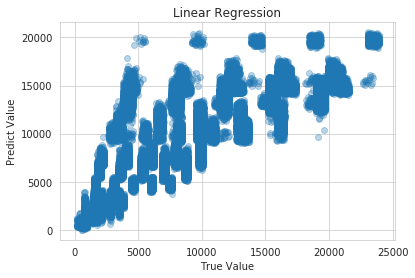

In [9]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE', round(mae, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
# plt.xlim([0, 100])
# plt.ylim([0, 100])
plt.show()

plt.cla()
plt.clf()
plt.close()

## KNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE: ' , mean_absolute_error(y_test, y_pred))
print('RMSE: ' , np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  2775.734029353771
RMSE:  3793.219495735534


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

2389.0739506704876

# Experiments

In [12]:
# def model_training(model_name, model, X_train, y_train):
#     model.fit(X_train, y_train)
#     return model
    
# def model_prediction(model, X_test):
#     y_pred = model.predict(X_test)
#     return y_pred

# def model_evaluation(model_name, y_test, y_pred):
#     print(model_name)
#     print('MAE', mean_absolute_error(y_test, y_pred))
#     print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
#     plt.scatter(y_test, y_pred, alpha=0.3)
#     plt.plot(range(0,30000, 100), range(0,30000, 100), '--r', alpha=0.3, label='Line1')
#     plt.title(model_name)
#     plt.xlabel('True Value')
#     plt.ylabel('Predict Value')
#     plt.xlim([0, 30000])
#     plt.ylim([0, 30000])
#     plt.show()
#     print('')

# plt.cla()
# plt.clf()
# plt.close()

    
# def run_experiment(model_name, model, X_train, y_train, X_test):
#     train_model = model_training(model_name, model, X_train, y_train)
#     predictions = model_prediction(train_model, X_test)
#     model_evaluation(model_name, y_test, predictions)
    
# run_experiment('Linear Regression', LinearRegression(), X_train, y_train, X_test)
# run_experiment('KNN 5', KNeighborsRegressor(5), X_train, y_train, X_test)
# run_experiment('KNN 2', KNeighborsRegressor(2), X_train, y_train, X_test)
# run_experiment('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test)
# run_experiment('Random Forest 10', RandomForestRegressor(10), X_train, y_train, X_test)
# run_experiment('Random Forest 100', RandomForestRegressor(100), X_train, y_train, X_test)


# Error Analysis

In [13]:
# model = RandomForestRegressor(100)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)


In [14]:
#for i in range(len(X_test.columns)):
fi = []
for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])
pd.DataFrame(fi).sort_values(1, ascending=False)

,0,1
41,Product_Category_1_1,0.295914
46,Product_Category_1_6,0.118179
0,User_ID,0.088520
50,Product_Category_1_10,0.066402
56,Product_Category_1_16,0.049166
42,Product_Category_1_2,0.038151
55,Product_Category_1_15,0.034614
47,Product_Category_1_7,0.030553
43,Product_Category_1_3,0.023429
48,Product_Category_1_8,0.022138


In [15]:
X_test.head()

,User_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18
138750,1003466,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276667,1000676,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
526951,1003230,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231990,1005779,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71980,1005065,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_test = pd.DataFrame(X_test).copy()
df_test['Purchase'] = y_test
df_test['prediction'] = y_pred
df_test['abs_error'] = abs(df_test['Purchase']-df_test['prediction'])
df_test.sort_values(by='abs_error', ascending=False).round()

,User_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Purchase,prediction,abs_error
56548,1002742,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,4595,23265.0,18670.0
241659,1001264,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,23321,4701.0,18620.0
353311,1000423,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4624,23215.0,18591.0
388238,1005754,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,5163,23751.0,18588.0
467194,1005964,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,23325,4831.0,18494.0
431666,1000453,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,23589,5226.0,18363.0
69021,1004539,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5498,23744.0,18246.0
281241,1001335,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,23380,5204.0,18176.0
528233,1003422,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,5328,23427.0,18099.0
311109,1005954,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,5503,23538.0,18035.0


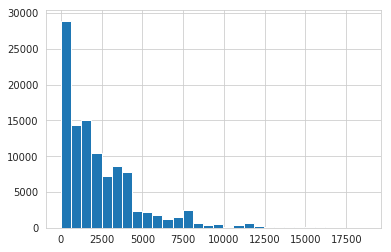

In [17]:
plt.hist(df_test['abs_error'], bins=30)
plt.show()

plt.cla()
plt.clf()
plt.close()

In [18]:
df_error = df_test[df_test['abs_error']>15000]
print(len(df_error))
df_error.head()

249


,User_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Purchase,prediction,abs_error
529497,1003589,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,18985,3818.0,15167.0
465685,1005736,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,19546,4238.0,15308.0
368825,1002840,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,3898,19118.5,15220.5
13994,1002079,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4070,19383.0,15313.0
432150,1000541,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,19540,3908.0,15632.0


In [19]:
df_error.describe()

,User_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Purchase,prediction,abs_error
count,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,...,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.002873e+06,0.228916,0.771084,0.032129,0.248996,0.441767,0.156627,0.060241,0.052209,0.008032,...,0.036145,0.048193,0.064257,0.056225,0.136546,0.036145,0.036145,11659.056225,12491.235944,15660.721888
std,1.842649e+03,0.420981,0.420981,0.176697,0.433302,0.497598,0.364180,0.238412,0.222896,0.089441,...,0.187026,0.214605,0.245704,0.230819,0.344059,0.187026,0.187026,7853.334146,7880.437212,725.499099
min,1.000011e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3805.000000,3795.000000,15008.000000
25%,1.001246e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4166.000000,4222.000000,15226.000000
50%,1.002887e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4773.000000,19019.000000,15446.000000
75%,1.004387e+06,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19557.000000,19604.000000,15767.500000
max,1.006021e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23589.000000,23751.000000,18670.000000


In [20]:
df_error.corr()['abs_error'].dropna().sort_values(ascending=False)

abs_error                        1.000000
Product_Category_1_10            0.699175
Product_Category_2_13            0.523843
Product_Category_1_9             0.370888
Product_Category_1_15            0.293351
Product_Category_3_0             0.274799
Product_Category_2_0             0.269254
Occupation_5                     0.199594
Product_Category_3_16            0.174044
Product_Category_2_16            0.156044
Occupation_11                    0.124377
Product_Category_1_6             0.111629
Product_Category_1_7             0.104050
Stay_In_Current_City_Years_2     0.103233
Marital_Status_0                 0.101514
Occupation_1                     0.095406
prediction                       0.091599
Occupation_13                    0.085885
Product_Category_1_16            0.082671
Age_46-50                        0.076328
Occupation_17                    0.067928
City_Category_A                  0.065960
Stay_In_Current_City_Years_3     0.060307
Age_36-45                        0

In [21]:
df[df['Age_18-25']==1][['Gender_M']].head()

,Gender_M
70,0
71,0
72,0
73,0
74,0


# Cross Validation

In [22]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
#     ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),

]

k = 5
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train_k, X_test_k = X.values[train_index], X.values[test_index]
        y_train_k, y_test_k = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train_k, y_train_k.ravel())
        y_pred = model.predict(X_test_k)
        mae = mean_absolute_error(y_test_k, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_k, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)
    print('MAE: ', results[m[0]]['mae'])
    print('RMSE: ', results[m[0]]['rmse'])
    print('\n')

MODEL LinearRegression
MAE:  [2269.5898513636466, 2258.979007096421, 2263.263266741898, 2265.1349543321753, 2279.0396377637276]
RMSE:  [2996.508833848806, 2978.882876294143, 2989.61053851696, 2990.8357877878743, 3007.577876075585]


MODEL RandomForestRegressor10
MAE:  [2204.7397123946444, 2190.384053524627, 2199.255890373945, 2202.6263828569477, 2206.8136958541677]
RMSE:  [3046.4608247738847, 3024.98521928393, 3044.284906244231, 3043.0940673473615, 3048.6454583342615]


MODEL KNeighborsRegressor
MAE:  [2721.5578444138555, 2718.2909018192636, 2732.5931730456214, 2729.0528130958473, 2724.1742156908335]
RMSE:  [3750.7511871159986, 3750.0960323998456, 3761.7154618425025, 3764.9439175561347, 3764.397860398219]


MODEL DecisionTreeRegressor
MAE:  [2404.864729903077, 2394.07609517916, 2398.777949309697, 2398.2830720084958, 2405.8356822916653]
RMSE:  [3458.6050618067306, 3451.359766516185, 3455.021051292488, 3448.5560480578183, 3461.7923564779644]




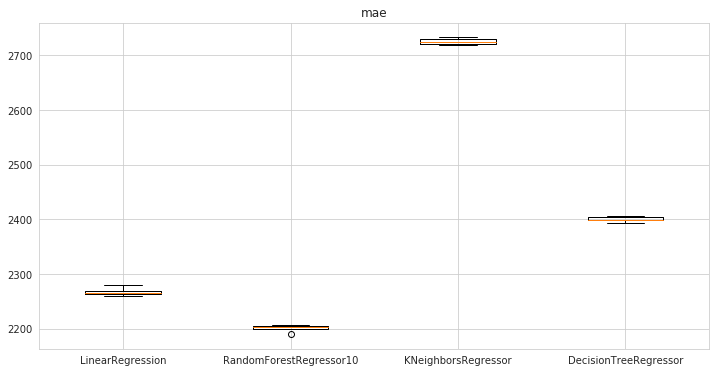

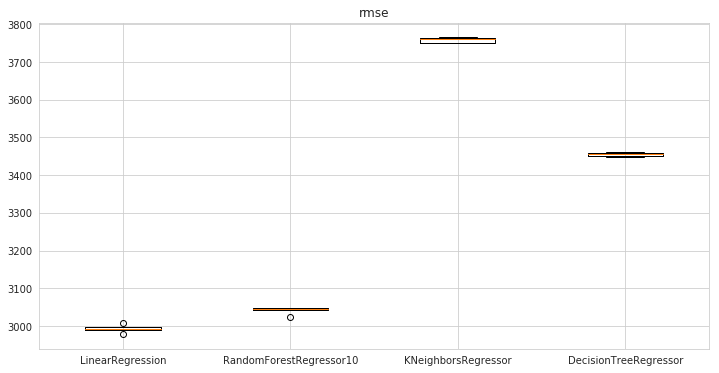

In [23]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()